In [54]:
import subprocess
import os
import pandas as pd

In [88]:
def compile(window_size: int):
    out = subprocess.run(["g++", "-std=c++23", "stepwise_realdata.cpp", "-o", "stepwise_realdata", f"-DWINSIZE={window_size}"])
    return out

In [89]:
def run():
    out = subprocess.run(["./stepwise_realdata"], cwd=os.getcwd(), capture_output=True)
    return out

In [107]:
compile(50)

CompletedProcess(args=['g++', '-std=c++23', 'stepwise_realdata.cpp', '-o', 'stepwise_realdata', '-DWINSIZE=50'], returncode=0)

In [108]:
out = run().stdout

In [109]:
nums = [[float(s) for s in line.split()] for line in out.splitlines()]

In [110]:
df = pd.DataFrame(nums, columns=['t', 'press', 'm', 'b']).set_index('t')

In [111]:
len(df)

40000

<Axes: xlabel='t'>

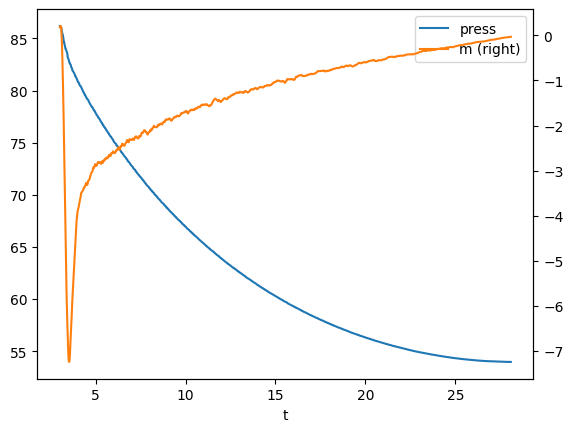

In [112]:
df[['press', 'm']].loc[3:28.09].plot(secondary_y='m')